# Matplotlib BoxPlot cheatsheet

## Import bibliotek i danych
### Dataset
AirBnB rentals in Valencia : http://insideairbnb.com/get-the-data.html | Valencia, Valencia, Spain | listings.csv.gz

In [56]:
import pandas as pd
import IPython

In [153]:
listings = pd.read_csv('ValenciaListings.csv')

In [154]:
listings.head(4)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,48154,https://www.airbnb.com/rooms/48154,20210921151226,2021-09-21,beautiful apartment wifi,<b>The space</b><br />Hello everybody and than...,NaN,https://a0.muscache.com/pictures/1109085/9c0d4...,219476,https://www.airbnb.com/users/show/219476,Toni,2010-09-01,spain,Un saludo a todos. Espero que os pongáis en co...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/219476/profil...,https://a0.muscache.com/im/users/219476/profil...,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,MORVEDRE,LA SAIDIA,39.48375,-0.37502,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""TV"", ""Free street parking"", ""Iron"", ""Air con...",$70.00,3,25,3,3,25,25,3.0,25.0,NaN,t,26,56,86,361,2021-09-21,110,11,4,2011-03-08,2019-05-18,4.57,4.64,4.59,4.83,4.71,4.42,4.51,VT-41540-V,f,2,2,0,0,0.86
1,55692,https://www.airbnb.com/rooms/55692,20210921151226,2021-09-21,Delight in city center,A great place to stay and visit Valencia.<br /...,NaN,https://a0.muscache.com/pictures/329316/a5d6a7...,120649,https://www.airbnb.com/users/show/120649,Pilar,2010-05-08,"Valencia, Valencian Community, Spain","We are a couple from Spain, no kids, no pets, ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/120649/profil...,https://a0.muscache.com/im/users/120649/profil...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,LA SEU,CIUTAT VELLA,39.47658,-0.37654,Entire rental unit,Entire home/apt,3,NaN,NaN,1.0,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Long term stays all...",$100.00,1,730,1,1,730,730,1.0,730.0,NaN,t,0,0,0,82,2021-09-21,1,0,0,2014-11-11,2014-11-11,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.01
2,95393,https://www.airbnb.com/rooms/95393,20210921151226,2021-09-21,Modern and bright Duplex 3 Bedrooms Center Wi-Fi,"This is ""Edificio Palomar Apartments"", I will ...",It is just 10 min walking distance to the Cath...,https://a0.muscache.com/pictures/931683/64aebc...,508042,https://www.airbnb.com/users/show/508042,Carmen,2011-04-14,"Valencia, Valencian Community, Spain",Nice to meet you. I´m valencian and love my jo...,within a few hours,100%,35%,f,https://a0.muscache.com/im/pictures/user/ba968...,https://a0.muscache.com/im/pictures/user/ba968...,Ciutat Vella,6.0,6.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Valencia, Valenciana, Spain",EL CARME,CIUTAT VELLA,39.47685,-0.38181,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,6.0,"[""Stove"", ""TV"", ""Iron"", ""Dishwasher"", ""Oven"", ...",$141.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,15,34,64,231,2021-09-21,100,2,0,2013-07-01,2019-04-19,4.79,4.77,4.93,4.90,4.77,4.78,4.70,31815,f,6,6,0,0,1.00
3,100347,https://www.airbnb.com/rooms/100347,2

In [155]:
listings.shape

(5545, 74)

### Przygotowanie danych
BoxPlot przyjmuje dane wejściowe w postaci Array lub Vector. W tym celu tworzymy Pandas.Series dla każdego z wymiarów który chcemy wyświetlić.

In [156]:
#recode price to float
listings['price'] = listings['price'].apply(lambda x: float(x.replace('$','').replace(',','')))

#prepare tuples for each room_type
frames = [(i,listings.loc[(listings['room_type']==i) & (listings['price']<800)]['price']) for i in listings['room_type'].unique()]
name, price = [i[0] for i in frames], [i[1] for i in frames]

## BoxPlot - opis
[To do]

[Link do dokumentacji](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)

### BoxPlot - opis elemetów

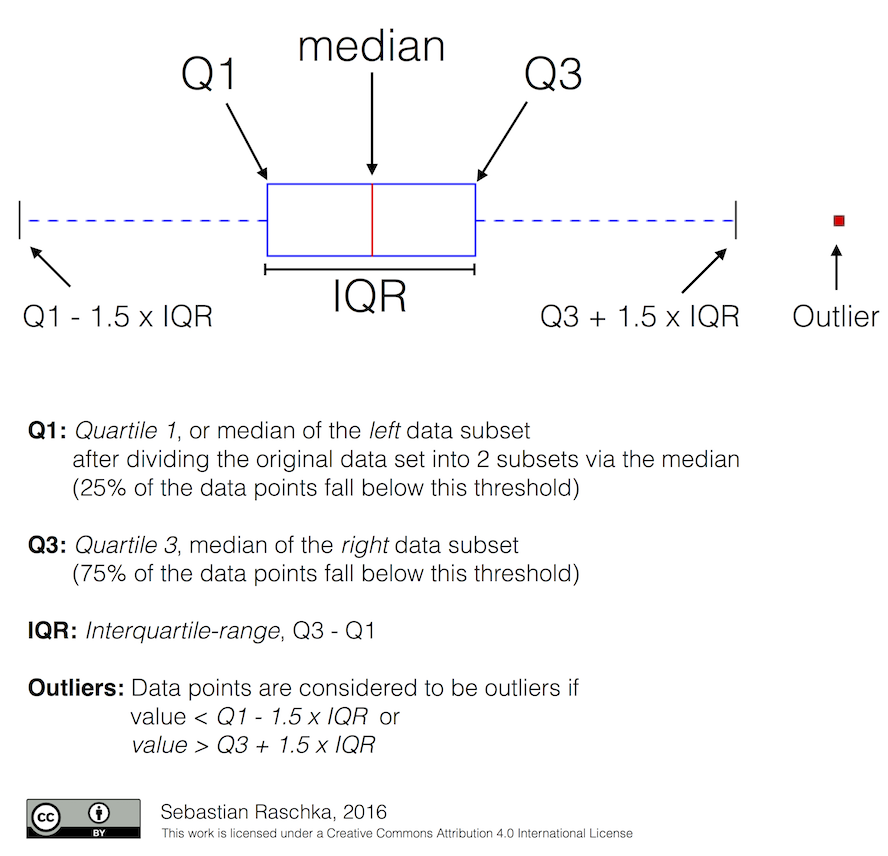

In [157]:
url = 'https://matplotlib.org/stable/_images/boxplot_explanation.png'
IPython.display.Image(url)

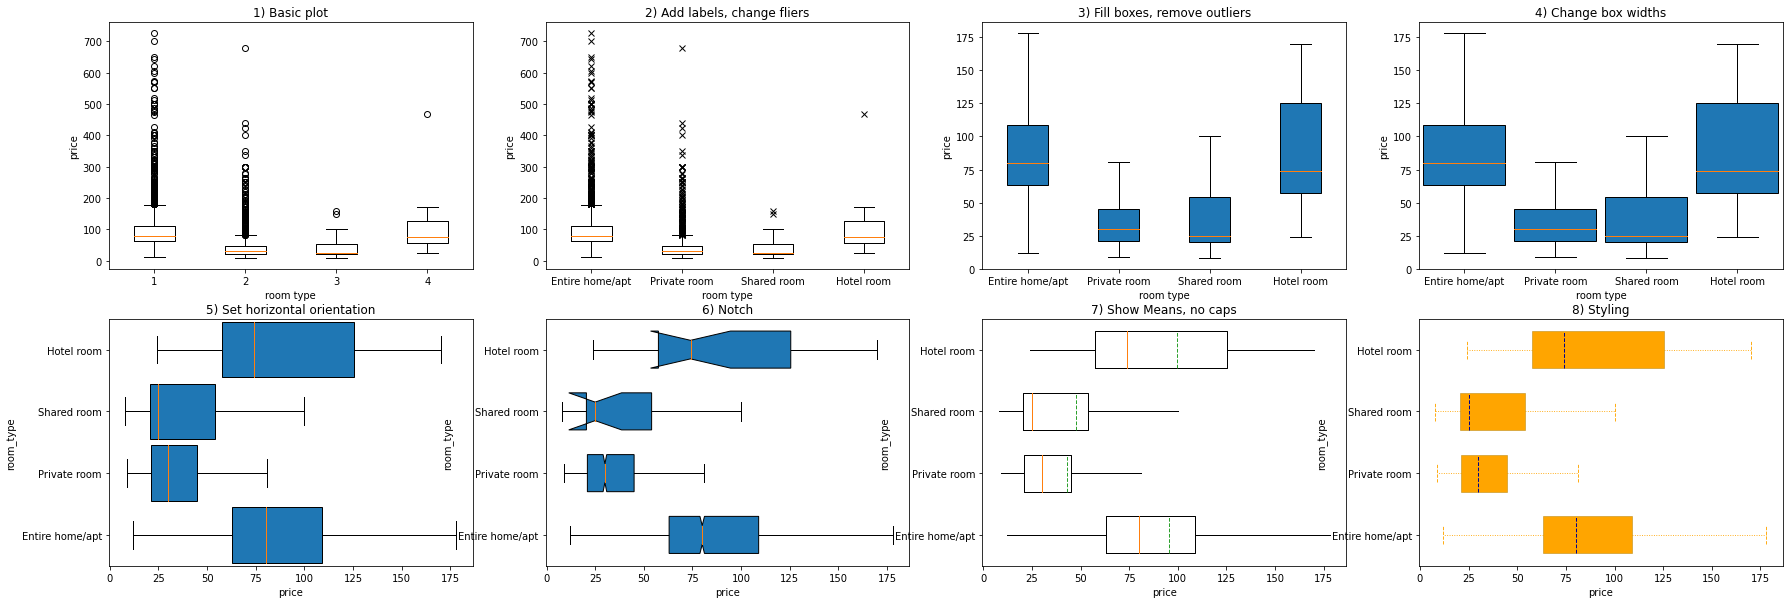

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), sharey=False)

# helper function to set axes names
def set_labels(ax, title, vertical=True):
    ax.set_ylabel('price') if vertical else ax.set_xlabel('price')
    ax.set_xlabel('room type') if vertical else ax.set_ylabel('room_type')
    ax.set_title(title)

title = '1) Basic plot'
ax = axs[0,0]
ax.boxplot(price)
set_labels(ax, title)

title = '2) Add labels, change fliers'
ax = axs[0,1]
ax.boxplot(x=price, labels=name, sym='x') # dodanie etykiet na oś X
set_labels(ax, title)

title = '3) Fill boxes, remove outliers'
ax = axs[0,2]
ax.boxplot(x=price,
           patch_artist=True,
           showfliers=False,
           labels = name
          )
set_labels(ax, title)

title = '4) Change box widths'
ax = axs[0,3]
ax.boxplot(x=price,
           patch_artist=True,
           showfliers=False,
           labels = name,
           widths = .9
          )
set_labels(ax, title)

title = '5) Set horizontal orientation'
ax = axs[1,0]
ax.boxplot(x=price,
           patch_artist=True,
           showfliers=False,
           labels = name,
           widths = .9,
           vert=0
          )
set_labels(ax, title, False)

title = '6) Notch'
ax = axs[1,1]
ax.boxplot(x=price,
           patch_artist=True,
           showfliers=False,
           labels = name,
           widths = .6,
           vert=0,
           notch = True
          )
set_labels(ax, title, False)

title = '7) Show Means, no caps'
ax = axs[1,2]
ax.boxplot(x=price,
           patch_artist=False,
           showfliers=False,
           labels = name,
           widths = .6,
           vert=0,
           notch = False,
           showmeans = True,
           meanline=True,
           showcaps = False
          )
set_labels(ax, title, False)

title = '8) Styling'
boxprops = dict(linestyle='solid', linewidth=.5, color='darkgoldenrod', facecolor='orange')
medianprops = dict(linestyle='dashed', linewidth=1, color='darkblue')
whiskerprops = dict(linestyle='dotted', linewidth=.9, color='orange')
capprops = dict(linestyle='dashed', linewidth=.9, color='orange')

ax = axs[1,3]
ax.boxplot(x=price,
           patch_artist=True,
           showfliers=False,
           labels = name,
           widths = .6,
           vert=0,
           boxprops=boxprops,
           medianprops=medianprops,
           whiskerprops=whiskerprops,
           capprops=capprops
          )
set_labels(ax, title, False)



plt.show()

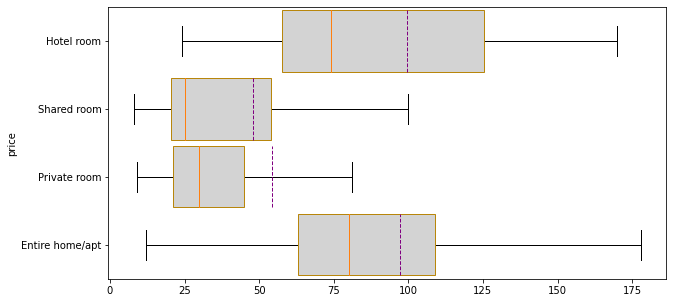

In [100]:
# All Params
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod', facecolor='lightgrey')
meanlineprops = dict(linestyle='--', linewidth=1, color='purple')

fig, ax = plt.subplots(figsize=(10,5))

ax.boxplot(
        # parameters
           x=hood_prices,
           notch=False, 
           sym=None, 
           vert=0, 
           whis=None, 
           bootstrap=None, 
           usermedians=None,
           conf_intervals=None, 
           positions=None, 
           widths=.9, 
           patch_artist=True,
           labels = hood_name,
           manage_ticks=True, 
           autorange=False,    
           meanline=True, 
           zorder=None,
    
        # extra parameters
           showcaps=None, 
           showbox=None, 
           showfliers=False,
           showmeans=True, 
           capprops=None,
           boxprops=boxprops, 
           whiskerprops=None, 
           flierprops=None, 
           medianprops=None, 
           meanprops=meanlineprops
          )
#ax.violinplot(hood_prices,showmeans=False,showmedians=True)
#ax.set_xlim((0,300))
ax.set_ylabel('price')

plt.show()